In [142]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
from tkinter import *
from PIL import ImageTk,Image


df=pd.read_csv('/Users/cokoli1/Desktop/NBA Python tools/NBA_2024_per_game(26-01-2024).csv')


In [188]:

TOT_df=df[df['Tm']=='TOT']['Player'].unique()
all_TOT_df=df[df['Player'].isin(TOT_df)]
all_TOT_df
final_df=pd.DataFrame()
unique_players=df['Player'].unique()

for players in TOT_df:
    teams=df[(df['Player']==players)&(df['Tm']!='TOT')]['Tm'].unique()
    combined_teams='/'.join(teams)

    df.loc[(df['Player']==players) &(df['Tm']=='TOT'),'Tm']=combined_teams

for player in unique_players:
    player_entries=df[df['Player']==player]
    combined_entries=player_entries[player_entries['Tm'].str.contains('/')]
    if not combined_entries.empty:
        final_df=pd.concat([final_df,combined_entries],ignore_index=True)
    else:
        final_df = pd.concat([final_df,player_entries],ignore_index=True)



final_df['LastName']=final_df['Player'].str.split(' ').str[-1]

final_df=final_df.sort_values(by='LastName')

final_df=final_df.drop(columns='LastName')


final_df=final_df.fillna(0)
final_df.head(20)




,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C-PF,24,TOR/NYK,37,0,16.2,2.8,5.8,0.479,...,0.587,2.0,3.2,5.2,1.3,0.5,0.5,1.0,1.6,6.6
1,Bam Adebayo,C,26,MIA,34,34,35.1,7.8,15.6,0.498,...,0.780,2.3,8.3,10.6,4.4,1.1,1.0,2.5,2.6,21.4
2,Ochai Agbaji,SG,23,UTA,45,10,20.1,2.2,5.1,0.435,...,0.750,0.8,1.8,2.5,0.9,0.6,0.6,0.7,1.4,5.8
3,Santi Aldama,PF,23,MEM,33,7,23.2,3.9,9.0,0.432,...,0.618,1.2,4.4,5.5,1.8,0.7,0.8,1.1,1.6,10.3
4,Nickeil Alexander-Walker,SG,25,MIN,44,14,22.7,2.4,5.6,0.429,...,0.704,0.4,1.4,1.8,2.5,0.9,0.6,1.0,1.8,6.6
5,Grayson Allen,SG,28,PHO,39,39,33.4,4.6,9.1,0.510,...,0.903,0.8,3.4,4.2,3.0,0.9,0.6,1.4,2.1,13.7
6,Jarrett Allen,C,25,CLE,37,37,30.3,6.2,9.3,0.661,...,0.750,3.5,6.8,10.3,3.0,0.9,1.1,1.8,2.4,14.9
7,Jose Alvarado,PG,25,NOP,27,0,16.0,2.4,5.9,0.413,...,0.645,0.4,1.7,2.1,1.8,0.9,0.4,0.8,1.4,7.0
8,Kyle Anderson,PF,30,MIN,44,2,22.6,2.5,5.3,0.466,...,0.698,0.7,2.9,3.5,4.0,0.8,0.6,1.3,1.6,6.4
9,Giannis Antetokounmpo,PF,29,MIL,42,42,35.2,11.6,19.2,0.605,...,0.669,2.7,9.0,11.7,6.2,1.3,1.1,3.6,2.9,31.3


In [145]:
def bestRebounders(df):

    print(f'These are the best rebounders in the NBA at the moment')

    rebound_df=final_df.sort_values(by='TRB',ascending=False).head(10)
    rebound_df.reset_index(inplace=True)
    rebound_df=rebound_df.drop(columns='index')


    return rebound_df

bestRebounders(final_df)


  

These are the best rebounders in the NBA at the moment


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Domantas Sabonis,C,27,SAC,42,42,35.3,8.0,13.1,0.610,...,0.677,3.2,9.6,12.8,7.9,0.8,0.5,3.3,3.2,20.0
1,Rudy Gobert,C,31,MIN,43,43,33.0,5.0,7.9,0.633,...,0.632,3.6,9.0,12.5,1.2,0.6,2.1,1.6,2.9,13.3
2,Anthony Davis,C,30,LAL,43,43,35.9,9.4,16.9,0.558,...,0.815,3.2,9.0,12.2,3.7,1.2,2.4,2.2,2.5,25.0
3,Nikola Jokić,C,28,DEN,44,44,33.6,10.2,17.3,0.590,...,0.825,3.0,9.0,12.0,9.1,1.1,0.9,2.8,2.6,26.2
4,Giannis Antetokounmpo,PF,29,MIL,42,42,35.2,11.6,19.2,0.605,...,0.669,2.7,9.0,11.7,6.2,1.3,1.1,3.6,2.9,31.3
5,Joel Embiid,C,29,PHI,32,32,34.3,12.1,22.4,0.539,...,0.887,2.7,8.8,11.6,5.9,1.2,1.9,3.6,2.9,36.1
6,Jalen Duren,C,20,DET,29,28,29.7,6.2,9.8,0.636,...,0.692,3.1,8.2,11.3,2.5,0.4,0.9,2.0,3.3,14.0
7,Ben Simmons,PG,27,BRK,6,6,31.8,3.2,6.0,0.528,...,0.250,2.7,8.2,10.8,6.7,0.5,0.8,2.5,2.7,6.5
8,Nikola Vučević,C,33,CHI,40,38,33.7,7.3,15.5,0.469,...,0.864,2.7,8.0,10.7,3.6,0.7,0.7,1.6,2.6,16.9
9,Bam Adebayo,C,26,MIA,34,34,35.1,7.8,15.6,0.498,...,0.780,2.3,8.3,10.6,4.4,1.1,1.0,2.5,2.6,21.4


In [146]:

def bestScorers(df):

    print(f'The following are pts per game')
    #df=final_df[final_df['PTS']>scorers]
    

    scorer_df=final_df.sort_values(by='PTS',ascending=False)
    scorer_df=scorer_df[(final_df['G']>15)]
    scorer_df.reset_index(inplace=True)
    scorer_df=scorer_df.drop(columns='index')


    return scorer_df.head(10)


bestScorers(final_df)

The following are pts per game


/var/folders/hh/_4ch972j5sn8qg_5slbn2h1c0000gq/T/ipykernel_53409/1383759514.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scorer_df=scorer_df[(final_df['G']>15)]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,C,29,PHI,32,32,34.3,12.1,22.4,0.539,...,0.887,2.7,8.8,11.6,5.9,1.2,1.9,3.6,2.9,36.1
1,Luka Dončić,PG,24,DAL,37,37,36.9,11.4,23.7,0.482,...,0.769,0.8,7.7,8.5,9.3,1.4,0.6,3.9,1.8,33.6
2,Giannis Antetokounmpo,PF,29,MIL,42,42,35.2,11.6,19.2,0.605,...,0.669,2.7,9.0,11.7,6.2,1.3,1.1,3.6,2.9,31.3
3,Shai Gilgeous-Alexander,PG,25,OKC,43,43,34.4,11.0,20.0,0.546,...,0.890,0.9,4.7,5.6,6.4,2.3,0.8,2.1,2.6,31.1
4,Kevin Durant,PF,35,PHO,37,37,37.1,10.3,19.5,0.529,...,0.873,0.5,5.9,6.4,5.7,0.9,1.2,3.1,1.9,29.1
5,Donovan Mitchell,SG,27,CLE,33,33,35.5,9.6,20.9,0.460,...,0.870,1.0,4.4,5.4,6.2,1.9,0.4,2.8,2.2,27.6
6,De'Aaron Fox,PG,26,SAC,36,36,35.6,9.8,21.0,0.465,...,0.717,0.9,3.3,4.1,5.6,1.6,0.4,2.5,2.5,27.4
7,Devin Booker,PG,27,PHO,35,35,36.1,9.5,19.1,0.494,...,0.881,0.7,4.2,4.9,7.5,0.9,0.3,2.7,3.0,27.2
8,Jayson Tatum,PF,25,BOS,41,41,36.0,9.1,19.4,0.469,...,0.808,0.9,7.5,8.4,4.4,1.0,0.5,2.5,2.1,27.0
9,Trae Young,PG,25,ATL,39,39,36.3,8.3,19.7,0.422,...,0.858,0.5,2.5,3.0,10.8,1.4,0.2,4.3,2.0,26.9


In [147]:
def bestPasser(df):
    print('These are currently the top assist makers in the league')

    assist_df=final_df.sort_values(by='AST',ascending=False).head(10)
    assist_df.reset_index(inplace=True)
    assist_df=assist_df.drop(columns='index')

    return assist_df

bestPasser(final_df)

These are currently the top assist makers in the league


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Tyrese Haliburton,PG,23,IND,34,34,33.4,8.4,16.9,0.496,...,0.862,0.6,3.5,4.1,12.6,1.1,0.6,2.5,1.1,23.6
1,Trae Young,PG,25,ATL,39,39,36.3,8.3,19.7,0.422,...,0.858,0.5,2.5,3.0,10.8,1.4,0.2,4.3,2.0,26.9
2,Luka Dončić,PG,24,DAL,37,37,36.9,11.4,23.7,0.482,...,0.769,0.8,7.7,8.5,9.3,1.4,0.6,3.9,1.8,33.6
3,Nikola Jokić,C,28,DEN,44,44,33.6,10.2,17.3,0.590,...,0.825,3.0,9.0,12.0,9.1,1.1,0.9,2.8,2.6,26.2
4,Fred VanVleet,PG,29,HOU,41,41,37.2,5.8,14.1,0.408,...,0.867,0.4,3.4,3.8,8.5,1.1,0.9,1.6,2.2,17.3
5,James Harden,PG,34,LAC,37,37,34.2,5.1,11.3,0.456,...,0.873,0.3,4.2,4.5,8.5,1.2,0.9,2.6,2.1,17.3
6,Ja Morant,PG,24,MEM,9,9,35.3,8.9,18.9,0.471,...,0.813,0.7,4.9,5.6,8.1,0.8,0.6,3.0,2.1,25.1
7,LaMelo Ball,PG,22,CHO,21,21,32.8,8.4,19.4,0.435,...,0.873,1.4,3.9,5.3,8.0,1.8,0.2,3.8,3.6,24.3
8,Domantas Sabonis,C,27,SAC,42,42,35.3,8.0,13.1,0.610,...,0.677,3.2,9.6,12.8,7.9,0.8,0.5,3.3,3.2,20.0
9,Devin Booker,PG,27,PHO,35,35,36.1,9.5,19.1,0.494,...,0.881,0.7,4.2,4.9,7.5,0.9,0.3,2.7,3.0,27.2


In [148]:
def bestBlocks(df):
    print('These are currently the top assist makers in the league')

    block_df=final_df.sort_values(by='BLK',ascending=False).head(10)
    block_df.reset_index(inplace=True)
    block_df=block_df.drop(columns='index')

    return block_df

bestBlocks(final_df)

These are currently the top assist makers in the league


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Victor Wembanyama,C,20,SAS,38,38,28.5,7.5,16.2,0.465,...,0.804,2.2,7.8,10.1,2.9,1.1,3.2,3.2,2.3,20.4
1,Brook Lopez,C,35,MIL,44,44,31.6,4.9,9.9,0.490,...,0.815,1.6,3.9,5.5,1.7,0.6,2.9,0.9,2.7,12.8
2,Walker Kessler,C,22,UTA,37,13,24.0,3.8,5.8,0.648,...,0.483,2.6,5.1,7.6,0.8,0.5,2.7,1.0,2.1,8.5
3,Chet Holmgren,C,21,OKC,44,44,30.2,6.4,11.9,0.541,...,0.779,1.5,5.8,7.3,2.8,0.6,2.6,1.7,2.7,17.1
4,Anthony Davis,C,30,LAL,43,43,35.9,9.4,16.9,0.558,...,0.815,3.2,9.0,12.2,3.7,1.2,2.4,2.2,2.5,25.0
5,Nic Claxton,C,24,BRK,33,33,29.3,5.4,8.4,0.637,...,0.574,3.2,7.2,10.3,1.7,0.7,2.2,1.2,2.5,12.4
6,Rudy Gobert,C,31,MIN,43,43,33.0,5.0,7.9,0.633,...,0.632,3.6,9.0,12.5,1.2,0.6,2.1,1.6,2.9,13.3
7,Daniel Gafford,C,25,WAS,38,38,26.1,4.3,6.2,0.692,...,0.727,2.6,4.9,7.5,1.6,0.9,2.1,1.1,3.4,10.5
8,Joel Embiid,C,29,PHI,32,32,34.3,12.1,22.4,0.539,...,0.887,2.7,8.8,11.6,5.9,1.2,1.9,3.6,2.9,36.1
9,Kristaps Porziņģis,C,28,BOS,32,32,30.0,6.5,12.3,0.525,...,0.837,1.7,5.2,6.8,2.0,0.7,1.9,1.6,2.9,19.5


In [149]:
def bestStealer(df):
    print('These are currently the top stealers makers in the league')

    stealer_df=final_df.sort_values(by='STL',ascending=False).head(10)
    stealer_df.reset_index(inplace=True)
    stealer_df=stealer_df.drop(columns='index')

    return stealer_df
    
bestStealer(final_df)

These are currently the top stealers makers in the league


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Shai Gilgeous-Alexander,PG,25,OKC,43,43,34.4,11.0,20.0,0.546,...,0.890,0.9,4.7,5.6,6.4,2.3,0.8,2.1,2.6,31.1
1,Marcus Smart,PG,29,MEM,20,20,30.3,5.1,11.9,0.430,...,0.768,0.3,2.4,2.7,4.3,2.1,0.3,3.1,2.7,14.5
2,Donovan Mitchell,SG,27,CLE,33,33,35.5,9.6,20.9,0.460,...,0.870,1.0,4.4,5.4,6.2,1.9,0.4,2.8,2.2,27.6
3,LaMelo Ball,PG,22,CHO,21,21,32.8,8.4,19.4,0.435,...,0.873,1.4,3.9,5.3,8.0,1.8,0.2,3.8,3.6,24.3
4,Kawhi Leonard,SF,32,LAC,38,38,34.7,8.8,16.9,0.522,...,0.879,1.1,5.1,6.2,3.8,1.7,0.8,1.6,1.6,23.7
5,De'Anthony Melton,SG,25,PHI,33,33,29.1,3.9,9.9,0.393,...,0.827,0.8,3.2,4.0,3.2,1.6,0.5,1.2,2.4,11.8
6,Matisse Thybulle,SF,26,POR,42,14,22.5,2.0,4.6,0.426,...,0.813,0.4,1.6,2.0,1.1,1.6,0.8,0.5,1.3,5.6
7,Paul George,PF,33,LAC,40,40,34.7,8.3,17.8,0.468,...,0.911,0.6,4.9,5.6,3.6,1.6,0.4,2.1,2.9,23.5
8,Darius Garland,PG,24,CLE,20,20,34.0,7.6,16.1,0.470,...,0.835,0.6,2.2,2.8,5.9,1.6,0.2,3.8,1.6,20.7
9,De'Aaron Fox,PG,26,SAC,36,36,35.6,9.8,21.0,0.465,...,0.717,0.9,3.3,4.1,5.6,1.6,0.4,2.5,2.5,27.4


In [152]:
def top_3pt_shooters(df):
    threept_df = final_df[(final_df['3PA'] > 3) & (final_df['G'] > 15)]  
    threept_df=threept_df.sort_values(by='3P%',ascending=False)
    threept_df.reset_index(inplace=True)

    threept_df=threept_df.drop(columns=['index'])

    
    
    
    return threept_df.head(10)

top_3pt_shooters(final_df)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Grayson Allen,SG,28,PHO,39,39,33.4,4.6,9.1,0.510,...,0.903,0.8,3.4,4.2,3.0,0.9,0.6,1.4,2.1,13.7
1,Malik Beasley,SG,27,MIL,42,42,29.4,4.2,8.6,0.488,...,0.750,0.6,3.4,4.0,1.4,0.7,0.1,0.7,2.1,11.6
2,Lonnie Walker IV,SG,25,BRK,25,0,18.5,4.5,9.2,0.489,...,0.763,0.2,2.1,2.3,1.4,0.6,0.4,1.2,1.1,12.4
3,Kevin Durant,PF,35,PHO,37,37,37.1,10.3,19.5,0.529,...,0.873,0.5,5.9,6.4,5.7,0.9,1.2,3.1,1.9,29.1
4,Aaron Nesmith,SF,24,IND,39,14,25.7,4.2,8.3,0.505,...,0.703,0.9,2.5,3.4,1.1,1.1,0.7,0.9,3.3,11.6
5,Norman Powell,SG,30,LAC,42,0,25.5,4.7,9.4,0.500,...,0.875,0.1,2.3,2.5,1.0,0.5,0.4,0.9,1.8,13.5
6,Doug McDermott,SF,32,SAS,39,0,15.5,2.1,4.7,0.449,...,0.667,0.2,0.9,1.1,1.3,0.3,0.1,0.6,1.1,6.2
7,CJ McCollum,PG,32,NOP,30,30,32.0,7.1,15.0,0.473,...,0.785,0.6,3.7,4.3,5.0,1.2,0.8,1.5,2.1,19.9
8,Jalen Williams,PF,22,OKC,41,41,32.0,7.3,13.4,0.543,...,0.826,0.6,3.6,4.1,4.5,1.1,0.5,1.8,2.7,18.7
9,Kawhi Leonard,SF,32,LAC,38,38,34.7,8.8,16.9,0.522,...,0.879,1.1,5.1,6.2,3.8,1.7,0.8,1.6,1.6,23.7


In [153]:
def top_FT_shooters(df):
    FT_df = final_df[(final_df['FTA'] > 3) & (final_df['G'] > 15)]  
    FT_df=FT_df.sort_values(by='FT%',ascending=False)
    FT_df.reset_index(inplace=True)
    FT_df=FT_df.drop(columns='index')
    
    
    
    return FT_df.head(10)

top_FT_shooters(final_df)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,PG,35,GSW,38,38,33.2,8.4,18.9,0.446,...,0.926,0.4,3.7,4.2,5.0,0.8,0.4,3.0,1.9,26.7
1,Damian Lillard,PG,33,MIL,41,41,35.2,7.4,17.5,0.426,...,0.922,0.5,3.8,4.3,6.8,1.1,0.1,2.4,1.6,25.3
2,Paul George,PF,33,LAC,40,40,34.7,8.3,17.8,0.468,...,0.911,0.6,4.9,5.6,3.6,1.6,0.4,2.1,2.9,23.5
3,De'Andre Hunter,SF,26,ATL,24,24,30.3,5.1,11.0,0.460,...,0.907,0.6,3.5,4.1,1.4,0.8,0.4,1.5,3.0,14.9
4,Tobias Harris,PF,31,PHI,41,41,34.1,6.7,13.1,0.509,...,0.902,1.0,5.0,6.0,3.2,1.0,0.5,1.5,1.7,17.7
5,Anfernee Simons,SG,24,POR,22,22,33.2,7.9,18.1,0.434,...,0.896,0.5,3.0,3.5,4.8,0.5,0.1,2.5,2.0,23.0
6,Kyrie Irving,SG,31,DAL,27,27,33.3,9.3,19.6,0.472,...,0.895,0.8,4.3,5.1,5.3,1.3,0.4,1.6,1.9,25.2
7,Alec Burks,SG,32,DET,37,0,20.5,3.8,9.7,0.391,...,0.895,0.4,1.9,2.3,1.5,0.4,0.2,0.7,1.5,12.7
8,Shai Gilgeous-Alexander,PG,25,OKC,43,43,34.4,11.0,20.0,0.546,...,0.890,0.9,4.7,5.6,6.4,2.3,0.8,2.1,2.6,31.1
9,Jordan Clarkson,SG,31,UTA,35,19,30.1,6.5,15.3,0.421,...,0.887,1.1,2.6,3.7,5.0,0.7,0.1,2.9,1.3,18.1


In [154]:
def topTalents(df):
    final_df['FG_100']=final_df['FG%']*100
    final_df['Average']=final_df[['PTS','AST','TRB','FG_100']].mean(axis=1)
    top_talents=final_df.sort_values(by='Average',ascending=False)
    top_talents=top_talents[top_talents['FGA']>5]
    top_talents.reset_index(inplace=True)
    top_talents=top_talents.drop(columns=['Average','index','FG_100'])

    return top_talents.head(6)
    

  

topTalents(final_df)



,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Giannis Antetokounmpo,PF,29,MIL,42,42,35.2,11.6,19.2,0.605,...,0.669,2.7,9.0,11.7,6.2,1.3,1.1,3.6,2.9,31.3
1,Joel Embiid,C,29,PHI,32,32,34.3,12.1,22.4,0.539,...,0.887,2.7,8.8,11.6,5.9,1.2,1.9,3.6,2.9,36.1
2,Nikola Jokić,C,28,DEN,44,44,33.6,10.2,17.3,0.590,...,0.825,3.0,9.0,12.0,9.1,1.1,0.9,2.8,2.6,26.2
3,Domantas Sabonis,C,27,SAC,42,42,35.3,8.0,13.1,0.610,...,0.677,3.2,9.6,12.8,7.9,0.8,0.5,3.3,3.2,20.0
4,Luka Dončić,PG,24,DAL,37,37,36.9,11.4,23.7,0.482,...,0.769,0.8,7.7,8.5,9.3,1.4,0.6,3.9,1.8,33.6
5,Shai Gilgeous-Alexander,PG,25,OKC,43,43,34.4,11.0,20.0,0.546,...,0.890,0.9,4.7,5.6,6.4,2.3,0.8,2.1,2.6,31.1


In [163]:
def sixthMan(df):
    sixth_df=final_df[(final_df['GS']<final_df['G']//2)]
    sixth_df=sixth_df.sort_values(by='PTS',ascending=False)
    sixth_df.reset_index(inplace=True)
    sixth_df=sixth_df.drop(columns=['index','Average','FG_100'])
    
    return sixth_df.head(6)


sixthMan(final_df)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Tim Hardaway Jr.,SF,31,DAL,41,8,29.8,6.2,14.7,0.421,...,0.871,0.3,3.3,3.6,1.7,0.5,0.0,1.0,1.5,18.1
1,Bogdan Bogdanović,SG,31,ATL,42,5,28.3,6.0,14.0,0.427,...,0.905,0.5,2.6,3.1,2.6,1.3,0.2,1.1,2.4,16.8
2,Caris LeVert,SG,29,CLE,32,1,28.8,5.7,13.5,0.422,...,0.743,0.5,3.1,3.6,4.1,1.0,0.4,1.6,1.6,15.8
3,Immanuel Quickley,SG-PG,24,NYK/TOR,42,12,26.2,5.2,11.9,0.440,...,0.866,0.2,2.9,3.1,3.5,0.6,0.1,1.1,1.6,15.5
4,Malik Monk,SG,25,SAC,41,0,26.0,5.1,11.7,0.436,...,0.822,0.4,2.2,2.6,5.5,0.6,0.7,2.1,2.0,15.0
5,Austin Reaves,SG,25,LAL,45,20,30.2,5.2,10.7,0.487,...,0.873,0.8,3.3,4.1,5.1,0.9,0.1,2.1,1.8,14.9


In [134]:
#def getStats(PlayerName,StateType):


root=Tk()
root.title('Select a player')
root.iconbitmap()
root.geometry("400x400")

#def show():
    #myLabel = Label(root,text=clicked.get()).pack()

players=final_df['Player'].unique()
clicked=StringVar(root)
clicked.set('----')
drop=OptionMenu(root,clicked,*players)
drop.pack()


#myButton = Button(root,text='Show Selection',command=show).pack()

def on_accept():
    player_name=clicked.get()
    pd.set_option('display.max_rows',None)
    player_stats=final_df[final_df['Player']==f'{player_name}']
    #stats_text=player_stats.to_string(index=False)
    #stats_label.config(text=stats_text)
    
    print(player_stats)
    root.destroy()

accept_button=Button(root,text='Accept',command=on_accept)
accept_button.pack()

#stats_label = Label(root, text="", justify=LEFT)  
#stats_label.pack()  



root.mainloop()




            Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  TRB  \
383  Austin Reaves  SG   25  LAL  34   9  29.4  5.2  11.0  0.477  ...  4.4   

     AST  STL  BLK  TOV   PF   PTS  Average  FG_100  Total_minutes  
383  4.9  0.9  0.1  2.3  1.6  15.1   18.025    47.7           1632  

[1 rows x 32 columns]


These are the best rebounders in the NBA at the moment
These are currently the top assist makers in the league
The following are pts per game
These are currently the top assist makers in the league


/var/folders/hh/_4ch972j5sn8qg_5slbn2h1c0000gq/T/ipykernel_53409/1383759514.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scorer_df=scorer_df[(final_df['G']>15)]
/Users/cokoli1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cokoli1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cokoli1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):

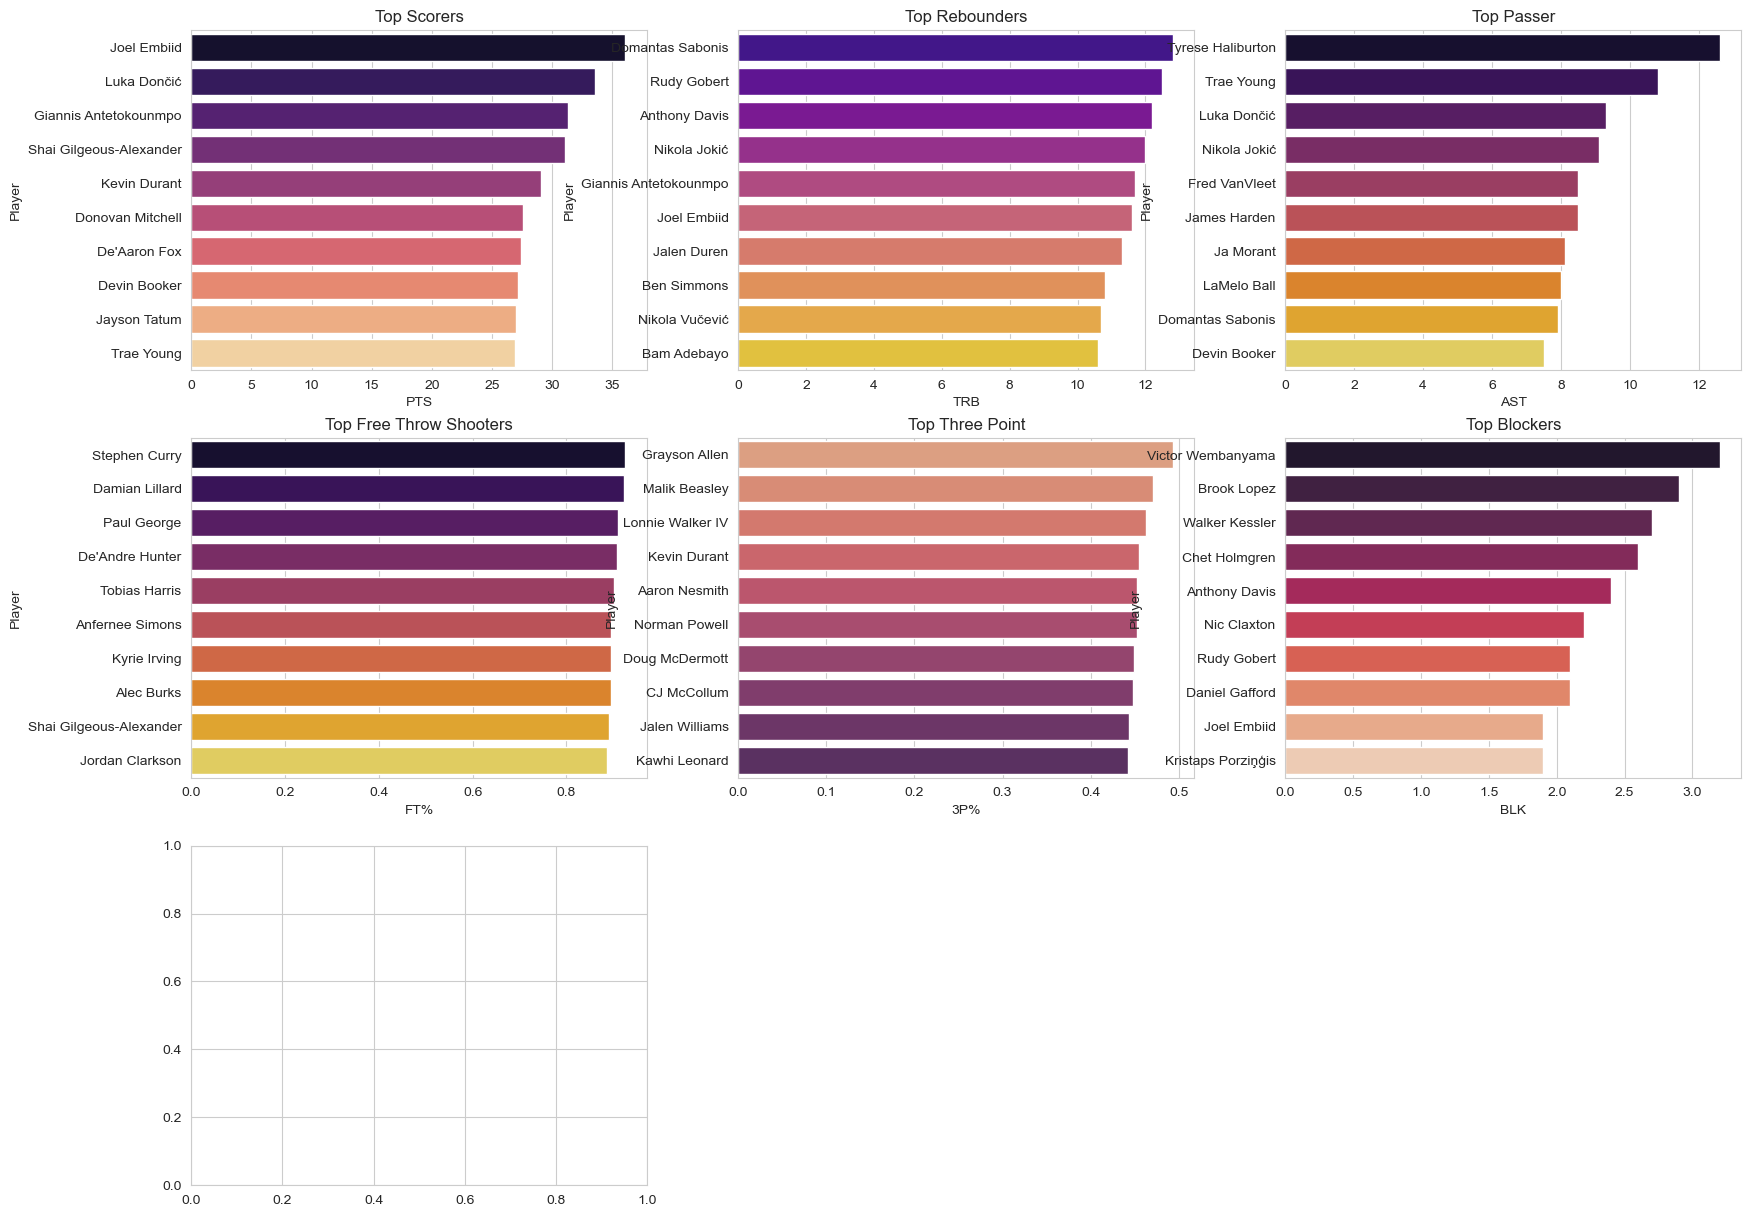

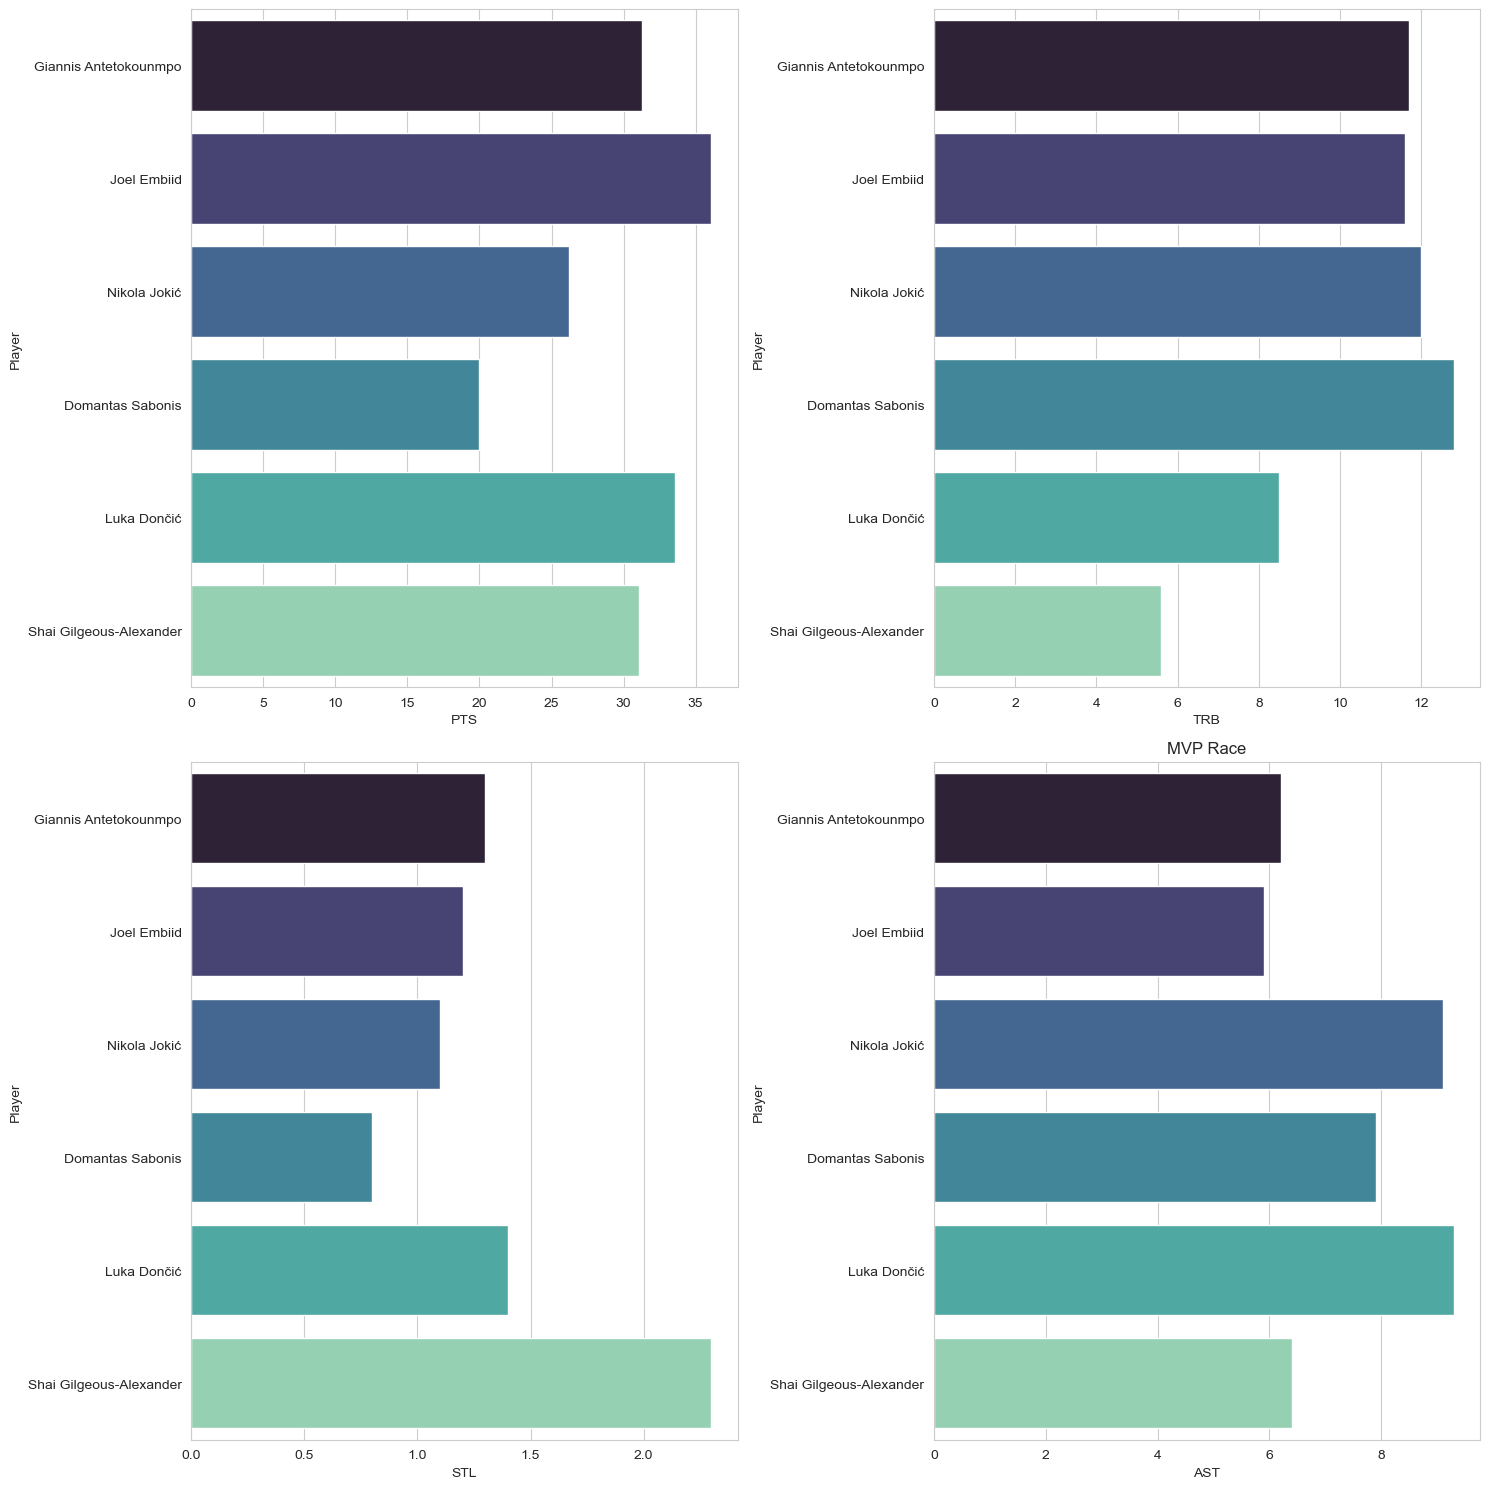

In [174]:
three_pt=top_3pt_shooters(final_df)
FT_df=top_FT_shooters(final_df)
reb_df=bestRebounders(final_df)
assist_df=bestPasser(final_df)
scorers_df=bestScorers(final_df)
MVP_ranking=topTalents(final_df)
best_blocks=bestBlocks(final_df)

"""
scorers_df=scorers_df[['Player','PTS']]
plt.figure(figsize=(10,6))
scorers_df.plot.bar(x='Player',y='PTS',rot=90)
plt.show()
"""
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.barplot(x='PTS',y='Player',data=scorers_df,palette='magma')
plt.title('Top Scorers')

plt.subplot(3,3,2)
sns.barplot(x='TRB',y='Player',data=reb_df,palette='plasma')
plt.title('Top Rebounders')

plt.subplot(3,3,3)
sns.barplot(x='AST',y='Player',data=assist_df,palette='inferno')
plt.title('Top Passer')

plt.subplot(3,3,4)
sns.barplot(x='FT%',y='Player',data=FT_df,palette='inferno')
plt.title('Top Free Throw Shooters')

plt.subplot(3,3,5)
sns.barplot(x='3P%',y='Player',data=three_pt,palette='flare')
plt.title('Top Three Point')

plt.subplot(3,3,6)
sns.barplot(x='BLK',y='Player',data=best_blocks,palette='rocket')
plt.title('Top Blockers')

plt.subplot(3,3,7)

fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 
axes_flat=axes.flatten()
stats=['PTS','TRB','STL','AST']
for i , stat in enumerate(stats):
    plt.title('MVP Race')
    ax=axes_flat[i]
    sns.barplot(x=stat,y='Player',data=MVP_ranking,palette='mako',ax=ax)
    




plt.tight_layout()
plt.show()